In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Remember that the transformation matrix we learned in the class has two indices
and the 1st index refers to the 'new' coordinate system's basis vectors, while
the 2nd one refers to the 'old' coordinate systems.

Each component of the transformation matrix refers to the direction cosine, which is
defined by the cos(th) where th denotes the 'angle' between the two participating 
basis vectors.

In [2]:
def rot_1(theta):
    """
    Theta: ccw about the current e1 basis vector
    
    Argument
    --------
    theta
    """
    rot = np.zeros((3,3))
    
    rot[0,0]=1.
    rot[1,1]=cos(theta)
    rot[1,2]=sin(theta)
    rot[2,1]=-sin(theta)
    rot[2,2]=cos(theta)
        
    return rot
def rot_2(theta):
    """
    Theta: ccw about the current e2 basis vector
    
    Argument
    --------
    theta
    """
    rot = np.zeros((3,3))
    
    rot[1,1]=1.
    rot[0,0]=cos(theta)
    rot[0,2]=-sin(theta)
    rot[2,0]=sin(theta)
    rot[2,2]=cos(theta)
    
    return rot
def rot_3(theta):
    """
    Theta: ccw about the current e3 basis vector
    
    Argument
    --------
    Theta
    """
    rot = np.zeros((3,3))
    
    rot[0,0]=cos(theta)
    rot[0,1]=sin(theta)
    rot[1,0]=-rot[0,1]
    rot[1,1]=cos(theta)    
    rot[2,2]=1.
        
    return rot

- Now, I'm generating the transformation matrix by combining the three sequential rotation matrices defined above.

In [3]:
def trans_matrix(th1,th2,th3):
    """
    Generate a transformation matrix by combining the three 
    sequential rotations along each basis vecotor
    
    Argument
    --------
    th1 (degree)
    th2 (degree)
    th3 (degree)
    """
    
    ## from degree to radian
    th1=np.radians(th1)
    th2=np.radians(th2)
    th3=np.radians(th3)
    
    r1=rot_1(th1)
    r2=rot_2(th2)
    r3=rot_3(th3)

    # conduct the below 
    #r_ij = r^3_ik r^2_kl r^1_lj
    
    # Notice the missing summation symboles for k and l indices, respectively.
    
    r=np.zeros((3,3))
    for i in xrange(3):
        for j in xrange(3): ## 
            
            ## summation over k and l
            for k in xrange(3): # summation over k index
                for l in xrange(3): # summation over l index
                    
                    ## r[i,j] appears on both left and right sides for sum-up.
                    r[i,j] = r[i,j] + r3[i,k]*r2[k,l]*r1[l,j] 
    return r                    

In [4]:
def gen_stress(s):
    """
    Given 6 independent components of stress tensor,
    returns it in the form of 3x3 matrix considering the symmetry
    
    s= [s11,s22,s33,s23,s13,s12] ## this is so-called the Voigt notation
    """
    stress=np.zeros((3,3))
    stress[0,0]=s[0]
    stress[1,1]=s[1]
    stress[2,2]=s[2]
    ## shear components
    stress[1,2]=s[3]
    stress[2,1]=s[3]
    
    stress[0,2]=s[4]
    stress[2,0]=s[4]
    
    stress[0,1]=s[5]
    stress[1,0]=s[5]

    return stress


In [5]:
def transform_stress(s,rot):
    """
    Rotate the stress tensor by using the given transformation matrix (rot)
    
    Arguments
    ---------
    s
    rot
    """
    
    #s_hat_ij= s_kl rot_ik rot_jl
    s_hat=np.zeros((3,3))
    for i in xrange(3):
        for j in xrange(3):
            
            ## summation over k and l
            for k in xrange(3): ## summation over index k
                for l in xrange(3): ## summation over index l
                    s_hat[i,j]=s_hat[i,j] + s[k,l]*rot[i,k]*rot[j,l]
                    
    return s_hat
    

2D stress referred in the new and old coordinate systems; the new coordinate system $\hat{\mathbf{e_i}}$ is generated by rotating the old coordinat system about $\mathbf{e}_3$.

[[ 60.  10.   0.]
 [ 10.  30.   0.]
 [  0.   0.   0.]]


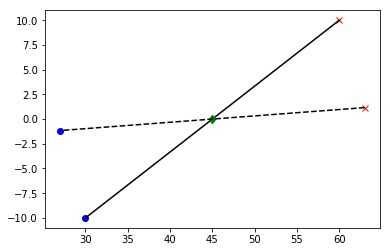

In [6]:
## example stress tensor expressed as in Voigt convention
s=[60,30,0,0,0,10]
## Convert the above to a 3x3 tensorial form
sigma=gen_stress(s)
print sigma

## stress referred in the old coordinate system
plot(sigma[0,0],sigma[0,1],'rx')
plot(sigma[1,1],-sigma[0,1],'bo')
plot((sigma[1,1]+sigma[0,0])/2.,0.,'gd')
plot([sigma[0,0],sigma[1,1]],[sigma[0,1],-sigma[0,1]],'k-')


## stress referred in the new coordinate system
trans_mat=trans_matrix(0,0,15) ## new coordinate system by rotating the old about e3.
sigma_hat = transform_stress(sigma,trans_mat)
plot(sigma_hat[0,0],sigma_hat[0,1],'rx')
plot(sigma_hat[1,1],-sigma_hat[0,1],'bo')
plot((sigma_hat[1,1]+sigma_hat[0,0])/2.,0.,'gd')

## check if the line connecting blue and cross points goes through the average stress point (the green diamond)
plot([sigma_hat[0,0],sigma_hat[1,1]],[sigma_hat[0,1],-sigma_hat[0,1]],'k--')

## 2D Mohr Circle

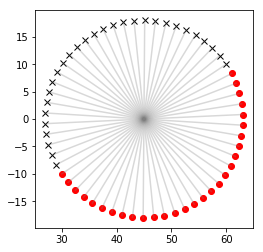

In [7]:
th3=np.linspace(0,90.,30)
th3=th3[1:] ## th3=0 and th3=90 leads to the same result - thus removing the first case.

for i in xrange(len(th3)):
    trans_mat=trans_matrix(0,0,th3[i])
    sigma_hat=transform_stress(sigma,trans_mat)
    plot(sigma_hat[0,0],sigma_hat[0,1],'ro')
    plot(sigma_hat[1,1],-sigma_hat[0,1],'kx')
    
    ## the line connecting the two stress coorindates
    x=[sigma_hat[0,0],sigma_hat[1,1]]
    y=[sigma_hat[0,1],-sigma_hat[0,1]]
    
    plot(x,y,'-',color='gray',alpha=0.3)
    
gca().set_aspect('equal')

## 3D Mohr Circle

In [8]:
np.sort([33,4,5])

array([ 4,  5, 33])

[[  30.    0.    0.]
 [   0.   60.    0.]
 [   0.    0.  120.]]


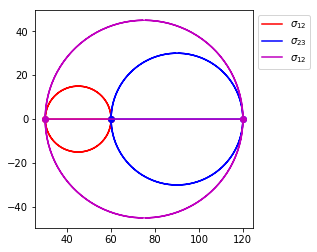

In [9]:
nsample = 200
th1=np.linspace(0.,180.,nsample)
th2=np.linspace(0.,180.,nsample)
th3=np.linspace(0.,180.,nsample)

## we start with a stress state in the principal space
## That way, rotation about e1,e2,e3 occurs in the planes of principal space.
## Start with a non-principal stress state (with shear components) and observe how
## the circles are 'deviated' from the Mohr circle you know of.
s=[30,60,120,0,0,0]
sigma=gen_stress(s)
print sigma

n_repeat=nsample

s12=np.zeros((2,n_repeat*2))
s23=np.zeros((2,n_repeat*2))
s13=np.zeros((2,n_repeat*2))

for i in xrange(n_repeat):
    ## -----------     (s12)
    th_1=th1[i]
    trans_mat = trans_matrix(0.,0.,th_1) 
    sigma_hat = transform_stress(sigma,trans_mat)
    
    xx=sigma_hat[0,0]
    yy=sigma_hat[1,1]
    xy=sigma_hat[0,1]
    s12[0,i]=max(xx,yy)
    s12[1,i]=xy
    
    s12[0,-1-i]=min(xx,yy)
    s12[1,-1-i]=-xy
    
    xx=sigma_hat[0,0]
    yy=sigma_hat[2,2]
    xy=sigma_hat[0,2]
    
    
    ## ----------- (s13)
    th_2=th2[i]
    trans_mat = trans_matrix(0.,th_2,0.)
    sigma_hat = transform_stress(sigma,trans_mat)

    xx=sigma_hat[0,0]
    yy=sigma_hat[2,2]
    xy=sigma_hat[0,2]
    s13[0,i]=max(xx,yy)
    s13[1,i]=xy
    
    s13[0,-1-i]=min(xx,yy)
    s13[1,-1-i]=-xy
    
    
    ## ------------ (s23)
    th_3=th3[i]
    trans_mat = trans_matrix(th_3,0,0)
    sigma_hat = transform_stress(sigma,trans_mat)

    xx=sigma_hat[1,1]
    yy=sigma_hat[2,2]
    xy=sigma_hat[1,2]
    s23[0,i]=max(xx,yy)
    s23[1,i]=xy
    
    s23[0,-1-i]=min(xx,yy)
    s23[1,-1-i]=-xy


plot(s12[0,:],s12[1,:],'-r',label=r'$\sigma_{12}$')
plot(s12[0,0],s12[1,0],'or')
plot(s12[0,-1],s12[1,-1],'or')

plot(s23[0,:],s23[1,:],'-b',label=r'$\sigma_{23}$')
plot(s23[0,0],s23[1,0],'ob')
plot(s23[0,-1],s23[1,-1],'ob')

plot(s13[0,:],s13[1,:],'-m',label=r'$\sigma_{12}$')
plot(s13[0,0],s13[1,0],'om')
plot(s13[0,-1],s13[1,-1],'om')


legend(bbox_to_anchor=(1,1))
gca().set_aspect('equal')